In [1]:
import pandas as pd
import numpy as np
from warnings import simplefilter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cleveland.csv",header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [6]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [7]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())


In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,male,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,male,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,male,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,female,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,male,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,male,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,female,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

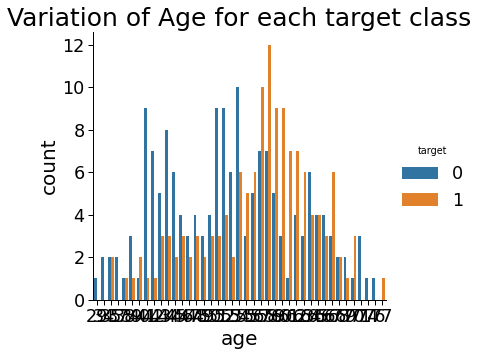

In [10]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

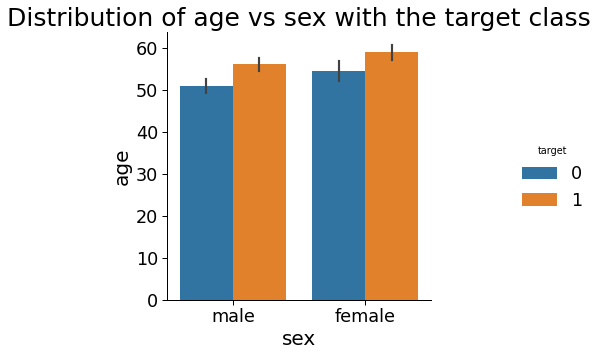

In [11]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()


In [12]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})


In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


Data preprocessing

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
X

array([[63.       ,  1.       ,  1.       , ...,  3.       ,  0.       ,
         6.       ],
       [67.       ,  1.       ,  4.       , ...,  2.       ,  3.       ,
         3.       ],
       [67.       ,  1.       ,  4.       , ...,  2.       ,  2.       ,
         7.       ],
       ...,
       [57.       ,  1.       ,  4.       , ...,  2.       ,  1.       ,
         7.       ],
       [57.       ,  0.       ,  2.       , ...,  2.       ,  1.       ,
         3.       ],
       [38.       ,  1.       ,  3.       , ...,  1.       ,  0.6722408,
         3.       ]])

In [16]:
y


array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [20]:
#########################################   SVM   #############################################################
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

#prediction from unseen data

y_pred =classifier.predict([[63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0]])
print(" Testing Unseen Data " , y_pred)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print("Prediction ", y_pred)

 Testing Unseen Data  [0]
Prediction  [0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0]


In [21]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [22]:
cm_test

array([[32,  9],
       [ 3, 17]], dtype=int64)

In [23]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.9256198347107438
Accuracy for test set for svm = 0.8032786885245902


In [24]:
#########################################   Naive Bayes  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.8677685950413223
Accuracy for test set for Naive Bayes = 0.7868852459016393


In [25]:
#Testing Unseen Data
y_pred =classifier.predict([[38 , 1 , 3 , 138 , 175 , 0 ,0, 173 , 0, 0, 1 , 0.67 , 3.0]])
y_pred
print(" Testing Unseen Data " , y_pred)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(" Prediction ",y_pred)

 Testing Unseen Data  [0]
 Prediction  [0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0]


In [26]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

cm_test

array([[30,  8],
       [ 5, 18]], dtype=int64)

In [27]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

cm_train

array([[117,  20],
       [ 12,  93]], dtype=int64)

In [28]:
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Naive Bayes = 0.8677685950413223
Accuracy for test set for Naive Bayes = 0.7868852459016393


In [29]:
#########################################   Logistic Regression  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#Testing Unseen Data
y_pred =classifier.predict([[38 , 1 , 3 , 138 , 175 , 0 ,0, 173 , 0, 0, 1 , 0.67 , 3.0]])
y_pred
print(" Testing Unseen Data " , y_pred)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print("Prediction",y_pred)

 Testing Unseen Data  [0]
Prediction [0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0]


In [30]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

cm_test

array([[32,  9],
       [ 3, 17]], dtype=int64)

In [31]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print(cm_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


[[118  22]
 [ 11  91]]

Accuracy for training set for Logistic Regression = 0.8636363636363636
Accuracy for test set for Logistic Regression = 0.8032786885245902


In [32]:
#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#Testing Unseen Data
y_pred =classifier.predict([[38 , 1 , 3 , 138 , 175 , 0 ,0, 173 , 0, 0, 1 , 0.67 , 3.0]])
print("Unseen Data Prediction", y_pred)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print()

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
print("Confusion Matrix Testing ", cm_test )

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix Training ", cm_train )

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Unseen Data Prediction [0]
[0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0]

Confusion Matrix Testing  [[26  7]
 [ 9 19]]
Confusion Matrix Training  [[129   0]
 [  0 113]]

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7377049180327869


In [33]:
#########################################  Random Forest  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier_random = RandomForestClassifier(n_estimators = 10)
classifier_random.fit(X_train, y_train)

#Testing Unseen Data
y_pred =classifier_random.predict([[38 , 1 , 3 , 138 , 175 , 0 ,0, 173 , 0, 0, 1 , 0.67 , 3.0]])
print("Unseen Data Prediction", y_pred)

# Predicting the Test set results
y_pred = classifier_random.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
print("Confusion Matrix Testing ", cm_test )



y_pred_train = classifier_random.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix Training ", cm_train )


print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Unseen Data Prediction [0]
Confusion Matrix Testing  [[29 10]
 [ 6 16]]
Confusion Matrix Training  [[128   4]
 [  1 109]]

Accuracy for training set for Random Forest = 0.9793388429752066
Accuracy for test set for Random Forest = 0.7377049180327869


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [35]:
###############################################################################
# applying lightGBM
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)

#Testing Unseen Data
y_pred =classifier.predict([[38 , 1 , 3 , 138 , 175 , 0 ,0, 173 , 0, 0, 1 , 0.67 , 3.0]])
print("Unseen Data Prediction", y_pred)


#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
       
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
print("Confusion Matrix Testing ", cm_test )

y_pred_train = clf.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix Training ", cm_train )

print()
print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score 0.466942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [36]:
# applying XGBoost

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 0)

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)


#Testing Unseen Data
y_pred =classifier.predict([[38 , 1 , 3 , 138 , 175 , 0 ,0, 173 , 0, 0, 1 , 0.67 , 3.0]])
print("Unseen Data Prediction", y_pred)

#Predicting
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
print("Confusion Matrix Testing ", cm_test )


y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix Training ", cm_train )

print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Unseen Data Prediction [0]
Confusion Matrix Testing  [[30 10]
 [ 5 16]]
Confusion Matrix Training  [[128   2]
 [  1 111]]

Accuracy for training set for XGBoost = 0.987603305785124
Accuracy for test set for XGBoost = 0.7540983606557377


In [37]:
#import joblib

In [38]:
#joblib.dump(classifier_random,"model2")

In [39]:
import pickle

In [40]:
pickle.dump(classifier_random, open('model_heart.pkl','wb'))
model = pickle.load(open('model_heart.pkl','rb'))